In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Вариант 17:
$$4^x-5x-2=0$$

In [43]:
def f(x):
    return 4**x-5*x-2

In [35]:
def df(x):
    return np.log(4)*np.float_power(4,x) - 5

In [36]:
def ddf(x):
    return np.log(4)**2*np.float_power(4,x)

In [37]:
def phi(x):
    return (np.float_power(4,x)-2)/5

In [38]:
def dphi(x):
    return np.log(4)*np.float_power(4,x)/5

In [47]:
def simpleIteration(phi, dphi, a, b, eps=0.001):
    q = max(abs(dphi(a)), abs(dphi(b)))
    x = (a + b) / 2
    k = 0
    go = True
    if q < 1:
        print(f'q = {q} < 1')
    else:
        return
    while go:
        k += 1
        x_cur = phi(x)

        print(f'x: {x_cur}, k: {k}, q/(1-q)*|x_cur - x|: {q * abs(x_cur - x) / (1 - q)}')
        if (q * abs(x_cur - x) / (1 - q)) <= eps:
            go = False

        x = x_cur
        if k == 1000:
            break
    return x_cur

In [8]:
def newton(f, df, x0, eps=0.001):
    x = x0
    k = 0
    go = True
    while go:
        k += 1
        x_cur = x - f(x) / df(x)
        print(f'x: {x_cur}, k: {k}, |x_cur - x|: {abs(x_cur - x)}')
        if abs(x_cur - x) <= eps:
            go = False

        x = x_cur

In [10]:
def show(f, df, x, step = 0.5, ddf = None):
    X = np.arange(x[0], x[-1], step)
    Y = [f(i) for i in X]
    dY = [df(i) for i in X]

    if ddf:
        ddY = [ddf(i) for i in X]

    fig, axis = plt.subplots()
    axis.plot(X, Y, label='f')
    axis.plot(X, dY, label='df')

    if ddf:
        axis.plot(X, ddY, label='ddf')

    axis.legend(loc='upper right')
    axis.grid()

    plt.show()

# Метод простых итераций

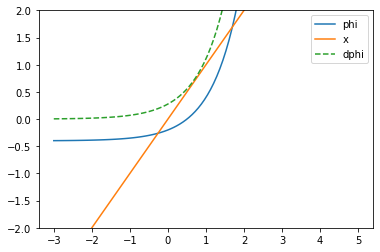

In [39]:
x = np.linspace(-3,5,100)
plt.plot(x,phi(x))
plt.plot(x,x)
plt.plot(x,dphi(x),linestyle='dashed')
plt.ylim(-2,2)
plt.legend(['phi','x','dphi'])
plt.show()

Будем искать решение на отрезке [-1,0], так как выполнено условие существовании и дифференцируемости phi и:
$$ \exists q:|\phi'(x)| \leq q < 1$$

In [48]:
print("Simple iteration:")
x_SI = simpleIteration(phi, dphi, -1, 0, eps = 0.0000001)

Simple iteration:
q = 0.2772588722239781 < 1
x: -0.3, k: 1, q/(1-q)*|x_cur - x|: 0.07672425480396929
x: -0.26804920892271056, k: 2, q/(1-q)*|x_cur - x|: 0.012257003179011712
x: -0.26207331722786337, k: 3, q/(1-q)*|x_cur - x|: 0.0022924791853818987
x: -0.26092593893197147, k: 4, q/(1-q)*|x_cur - x|: 0.00044015872365277053
x: -0.2607045511420817, k: 5, q/(1-q)*|x_cur - x|: 8.492906600995625e-05
x: -0.2606617936036601, k: 6, q/(1-q)*|x_cur - x|: 1.6402701363242687e-05
x: -0.26065353415156534, k: 7, q/(1-q)*|x_cur - x|: 3.168501535298095e-06
x: -0.2606519386209567, k: 8, q/(1-q)*|x_cur - x|: 6.120794848216399e-07
x: -0.26065163040011063, k: 9, q/(1-q)*|x_cur - x|: 1.1824007364810977e-07
x: -0.26065157085865476, k: 10, q/(1-q)*|x_cur - x|: 2.2841369160466985e-08


In [49]:
print("The value of the function at the found point:")
f(x_SI)

The value of the function at the found point:


5.7510481710210115e-08

# Метод Нютона

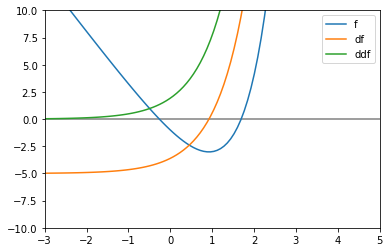

In [61]:
x = np.linspace(-3,5,100)
plt.plot(x,f(x))
plt.plot(x,df(x))
plt.plot(x,ddf(x))
plt.xlim(-3,5)
plt.ylim(-10,10)
plt.hlines(0,-4,10,color='grey')
plt.legend(['f','df','ddf'])
plt.show()

Решение будем искать на отрезке [-1,0], так как выполняются условия наличия корня:
$$f(-1)*f(0)<0\\x^0=-0.5: f(x^0)*f''(x^0)>0 
$$

In [64]:
print("Newton method:")
x0 = -0.5
newton(f, df, x0, 0.0000001)

Newton method:
x: -0.26781189376004433, k: 1, |x_cur - x|: 0.23218810623995567
x: -0.26065998943748053, k: 2, |x_cur - x|: 0.007151904322563796
x: -0.26065155661440526, k: 3, |x_cur - x|: 8.432823075277263e-06
x: -0.26065155660260353, k: 4, |x_cur - x|: 1.1801726262916645e-11
